# Universidad del Desarrollo
## Magister Data Science - Macroeconomía
### Grupo N°2: (Región de los Lagos)
* Jose Pedro
* Cristian
* Paul
* Max
* Hernan

## 6 - Cálculo de la inflación

In [33]:
import pandas as pd
from functools import reduce

import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

### Preparar la data

Importar la data

In [15]:
df_osorno = pd.read_csv('output/ipc_osorno.csv')
df_ptovaras = pd.read_csv('output/ipc_ptovaras.csv')
df_frutillar = pd.read_csv('output/ipc_frutillar.csv')
df_llanquihue = pd.read_csv('output/ipc_llanquihue.csv')
df_ptomontt = pd.read_csv('output/ipc_ptomontt.csv')
df_region = pd.read_csv('output/ipc_region.csv')

Convertir las columnas *Momento* a Datetime

In [16]:
df_osorno['Momento'] = pd.to_datetime(df_osorno.Momento)
df_ptovaras['Momento'] = pd.to_datetime(df_ptovaras.Momento)
df_frutillar['Momento'] = pd.to_datetime(df_frutillar.Momento)
df_llanquihue['Momento'] = pd.to_datetime(df_llanquihue.Momento)
df_ptomontt['Momento'] = pd.to_datetime(df_ptomontt.Momento)
df_region['Momento'] = pd.to_datetime(df_region.Momento)

Renombrar las columnas *IPC* para poder juntarnos en un solo dataframe

In [17]:
df_osorno.rename(columns={'ipc': 'osorno'}, inplace=True)
df_ptovaras.rename(columns={'ipc': 'ptovaras'}, inplace=True)
df_frutillar.rename(columns={'ipc': 'frutillar'}, inplace=True)
df_llanquihue.rename(columns={'ipc': 'llanquihue'}, inplace=True)
df_ptomontt.rename(columns={'ipc': 'ptomontt'}, inplace=True)
df_region.rename(columns={'ipc': 'region'}, inplace=True)

Eliminar la columna acumulada en el df de la región

In [18]:
df_region.drop(['ipcAcumulado'], axis=1, inplace=True)

Juntar los dataframes en uno solo para poder hacer análisis conjuntos

In [19]:
dfs = [df_osorno, df_ptovaras, df_frutillar, df_llanquihue, df_ptomontt]

In [20]:
df_ciudades = reduce(lambda left,right: pd.merge(left,right,on='Momento'), dfs)

In [21]:
df_ciudades.head()

,Momento,osorno,ptovaras,frutillar,llanquihue,ptomontt
0,2014-09-01,0.163939,0.158482,0.150957,0.157679,0.169177
1,2014-10-01,0.164969,0.167828,0.176805,0.173846,0.168532
2,2014-11-01,0.165208,0.163989,0.174068,0.169483,0.159858
3,2014-12-01,0.166851,0.169855,0.166861,0.166861,0.168076
4,2015-01-01,0.162385,0.161568,0.166861,0.166861,0.163990


### Volatilidad

Veamos que tan volatil son las ciudades. Vamos a crear un dataframe que muestra la desviación estándar por ciudad, por periodo completo.

In [22]:
df_vol = pd.DataFrame(df_ciudades.std(axis=0), columns=['Volatilidad']).sort_values(by='Volatilidad')
df_vol

,Volatilidad
osorno,0.003833
ptomontt,0.003939
ptovaras,0.004582
llanquihue,0.008653
frutillar,0.009202


Vemos que entre Osorno (la ciudad menos volatil) y Frutillar (la más volátil) hay mucha diferencia.

### incorporación de datos contextuales

Vamos a buscar datos adicionales del [Censo 2017](https://resultados.censo2017.cl/Region?R=R10)

In [23]:
df_censo = pd.read_excel('input/datos_censo.xlsx')

In [24]:
df_censo

,Total población,Total viviendas,Edad promedio,Declara trabajar,Educ superior terminada
ptomontt,245902,93380,33.6,0.60,0.74
frutillar,18428,7909,36.5,0.57,0.77
ptovaras,44578,17643,34.9,0.65,0.84
llanquihue,17591,6135,36.4,0.56,0.73
osorno,161460,60132,36.1,0.57,0.76


In [25]:
df = pd.concat([df_vol, df_censo], axis=1, sort=True)
df.sort_values(by='Volatilidad')

,Volatilidad,Total población,Total viviendas,Edad promedio,Declara trabajar,Educ superior terminada
osorno,0.003833,161460,60132,36.1,0.57,0.76
ptomontt,0.003939,245902,93380,33.6,0.60,0.74
ptovaras,0.004582,44578,17643,34.9,0.65,0.84
llanquihue,0.008653,17591,6135,36.4,0.56,0.73
frutillar,0.009202,18428,7909,36.5,0.57,0.77


Al parecer, las ciudades más grandes son también los menos volatiles

### Inflación acumulada por ciudad

In [26]:
df_ciudades['osorno_acum'] = df_ciudades['osorno'].cumsum()
df_ciudades['ptovaras_acum'] = df_ciudades['ptovaras'].cumsum()
df_ciudades['frutillar_acum'] = df_ciudades['frutillar'].cumsum()
df_ciudades['llanquihue_acum'] = df_ciudades['llanquihue'].cumsum()
df_ciudades['ptomontt_acum'] = df_ciudades['ptomontt'].cumsum()

In [27]:
df_acum = pd.DataFrame(df_ciudades.max(axis=0), columns=['Inflación Acumulada'])[-5:].sort_values(by='Inflación Acumulada')
df_acum

,Inflación Acumulada
ptovaras_acum,7.67801
osorno_acum,7.68213
frutillar_acum,7.68236
ptomontt_acum,7.68281
llanquihue_acum,7.68509


Vemos que la inflación acumulada es muy similar entre las ciudades

### Graficando la inflación por ciudad

In [82]:
data_plot = df_ciudades.iloc[:,0:6].melt('Momento', var_name='ciudades',  value_name='ipc')

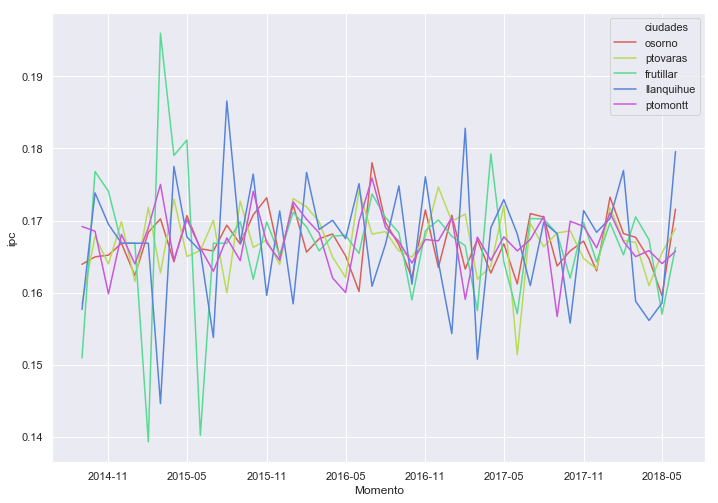

In [83]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.lineplot(x="Momento", y="ipc", palette='hls',
                  hue="ciudades", 
                  data=data_plot)

Visualmente, podemos ver que Frutillar y Llanquihue parecen ser las ciudades más volátiles. Esto coincide con lo que vimos cuando sacamos la desviación estándar.

### Graficando la inflación acumulada por ciudad

In [71]:
data_plot = df_ciudades[['Momento', 'osorno_acum', 'ptovaras_acum', 'frutillar_acum', 'llanquihue_acum', 'ptomontt_acum']].melt('Momento', var_name='ciudades',  value_name='acum')

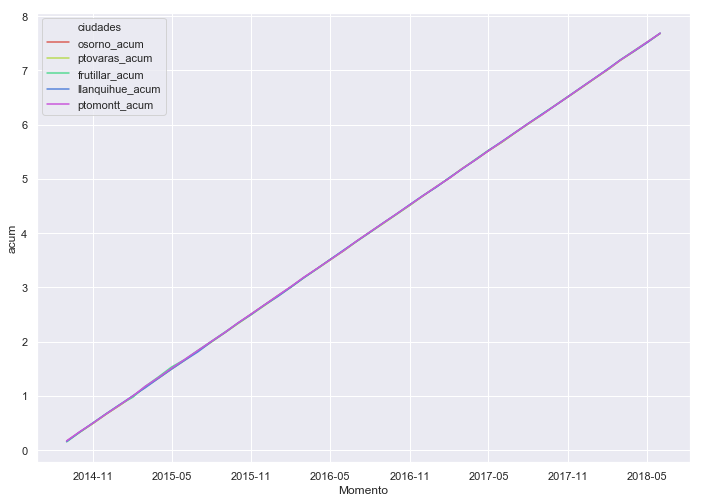

In [73]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.lineplot(x="Momento", y="acum", palette='hls',
                  hue="ciudades", 
                  data=data_plot)